In [2]:
import torch

## Calculate mean and std

In [ ]:
import os
from torchvision import transforms
import pandas as pd
from PIL import Image
from tqdm.notebook import tqdm

In [2]:
%run ./cxr14.py

In [3]:
images_dir = f'{DATASET_DIR}/images'
image_names = os.listdir(images_dir)
image_names = [i for i in image_names if i.endswith('.png')]
len(image_names)

112120

In [4]:
transform = transforms.ToTensor()

In [7]:
summed = torch.zeros(3, 1024, 1024)

for image_name in tqdm(image_names):
    fpath = os.path.join(images_dir, image_name)
    image = transform(Image.open(fpath).convert('RGB'))
    summed += image
    break
    
summed /= len(image_names)

In [101]:
summed.mean(dim=-1).mean(dim=-1)

tensor([0.4980, 0.4980, 0.4980])

In [106]:
summed.std(dim=-1).std(dim=-1)

tensor([0.0458, 0.0458, 0.0458])

## Load class `CXR14Dataset`

In [1]:
%run ./cxr14.py

In [4]:
762 + 555 + 114

1431

In [3]:
dataset = CXR14Dataset('val')
dataset.label_index['Pneumonia'].sum()

114

In [2]:
dataset = CXR14Dataset('test')
dataset.label_index['Pneumonia'].sum()

555

In [8]:
dataset.label_index['Pneumonia'].sum()

762

In [12]:
50 * 762

38100

In [9]:
(75714 - 762) / 762

98.36220472440945

In [7]:
dataset.label_index['Pneumonia']

0        0
1        0
2        0
3        0
4        0
        ..
75709    0
75710    0
75711    0
75712    0
75713    1
Name: Pneumonia, Length: 75714, dtype: int64

## Debug transforms

In [8]:
import matplotlib.pyplot as plt

In [4]:
image_name = image_names[0]

In [5]:
fpath = os.path.join(images_dir, image_name)
image = Image.open(fpath).convert('RGB')

In [108]:
tensor_image = torch.rand(3, 1024, 1024)

In [107]:
tf = transforms.ColorJitter(contrast=0.5)

In [109]:
tf(tensor_image)

TypeError: img should be PIL Image. Got <class 'torch.Tensor'>

In [110]:
tf = transforms.RandomRotation(15)

In [111]:
tf(tensor_image)

TypeError: img should be PIL Image. Got <class 'torch.Tensor'>

In [112]:
tf = transforms.RandomAffine(0, translate=(0.1, 0.1))

In [113]:
tf(tensor_image)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [116]:
tf = transforms.RandomResizedCrop((1024, 1024), scale=(0.8, 1))

In [117]:
tf(tensor_image)

AssertionError: img should be PIL Image

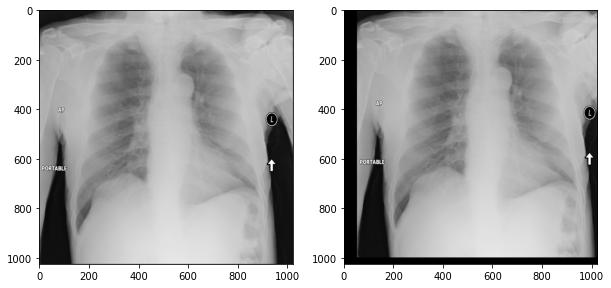

In [87]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(tf(image))

## Debug Augmentator

In [179]:
from torch.utils.data import DataLoader

In [173]:
%run cxr14.py

In [187]:
dataset = CXR14Dataset(max_samples=10, labels=['Pneumonia'])
dataset.label_index

,FileName,Pneumonia
4907,00001854_001.png,0
7409,00002692_001.png,0
12499,00004579_000.png,0
20207,00007218_000.png,0
24096,00008613_009.png,0
25262,00009067_004.png,0
35368,00012492_011.png,0
47852,00017002_000.png,0
50416,00017894_001.png,0
56711,00020147_007.png,0


In [175]:
%run augmentation.py

In [176]:
aug_dataset = Augmentator(dataset)
len(aug_dataset)

Augmenting all samples


60

In [177]:
%run sampler.py

In [180]:
sampler = OneLabelUnbalancedSampler(aug_dataset, label=0, max_ratio=None)
dataloader = DataLoader(aug_dataset, batch_size=2, sampler=sampler)

	Oversampling Atelectasis with ratio: 4, total 96 samples (original 60)


In [186]:
total = 0
for batch in dataloader:
    total += torch.sum(batch[1])
    
total

tensor(48)

In [165]:
def count_positive(dataset, label_index=0):
    total = 0
    for sample in dataset:
        label = sample[1][label_index]
        total += label
        if label:
            print('Positive: ', label, sample[-1])

    return total

In [166]:
count_positive(dataset)

Positive:  1 00009067_004.png
Positive:  1 00020147_007.png


2

In [167]:
count_positive(aug_dataset)

Positive:  1 00009067_004.png
Positive:  1 00009067_004.png
Positive:  1 00009067_004.png
Positive:  1 00009067_004.png
Positive:  1 00009067_004.png
Positive:  1 00009067_004.png
Positive:  1 00020147_007.png
Positive:  1 00020147_007.png
Positive:  1 00020147_007.png
Positive:  1 00020147_007.png
Positive:  1 00020147_007.png
Positive:  1 00020147_007.png


12

## Debug Undersampler

In [9]:
from torch.utils.data import DataLoader

In [6]:
%run cxr14.py

In [56]:
dataset = CXR14Dataset('train', labels=['Atelectasis'], max_samples=10)
len(dataset)

10

In [59]:
dataset.get_labels_presence_for(0)

[(0, 1),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0)]

In [61]:
%run augmentation.py

In [62]:
dataset_aug = Augmentator(dataset)
len(dataset_aug)

	Augmenting all samples


60

In [63]:
dataset_aug.get_labels_presence_for(0)

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 1),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 1),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 1),
 (37, 0),
 (38, 0),
 (39, 0),
 (40, 0),
 (41, 0),
 (42, 0),
 (43, 0),
 (44, 0),
 (45, 0),
 (46, 1),
 (47, 0),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 0),
 (54, 1),
 (55, 0),
 (56, 0),
 (57, 0),
 (58, 0),
 (59, 0)]

In [64]:
%run undersampler.py

In [66]:
sampler = OneLabelUnderSampler(dataset_aug, label=0)
dataloader = DataLoader(dataset_aug, batch_size=2, sampler=sampler)
sampler.resampled_indexes

	Undersampling Atelectasis (negative): positives=6 negatives=54 new-total=12 original=60


[43, 25, 30, 5, 17, 46, 36, 27, 9, 56, 54, 8]

In [20]:
for batch in dataloader:
    print(batch[1])

tensor([[0],
        [1]])
